## Pandas 연습과제

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

df = sns.load_dataset("titanic")
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. groupby를 사용해서 다음의 결과가 나오도록 구해보세요.
* embark_town 별로 평균 fare(운임요금)을 구합니다.
```
embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64
```

In [5]:
df_fare=df.groupby(["embark_town"])["fare"].mean()
df_fare

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

## 2. groupby를 사용해서 deck 별로 운임요금의 "count", "mean", "sum" 값을 구합니다.
* agg 를 사용해서 구할 수 있습니다. 아래의 결과가 나오도록 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>deck</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>A</th>
      <td>15</td>
      <td>39.623887</td>
      <td>594.3583</td>
    </tr>
    <tr>
      <th>B</th>
      <td>47</td>
      <td>113.505764</td>
      <td>5334.7709</td>
    </tr>
    <tr>
      <th>C</th>
      <td>59</td>
      <td>100.151341</td>
      <td>5908.9291</td>
    </tr>
    <tr>
      <th>D</th>
      <td>33</td>
      <td>57.244576</td>
      <td>1889.0710</td>
    </tr>
    <tr>
      <th>E</th>
      <td>32</td>
      <td>46.026694</td>
      <td>1472.8542</td>
    </tr>
    <tr>
      <th>F</th>
      <td>13</td>
      <td>18.696792</td>
      <td>243.0583</td>
    </tr>
    <tr>
      <th>G</th>
      <td>4</td>
      <td>13.581250</td>
      <td>54.3250</td>
    </tr>
  </tbody>
</table>

In [7]:
df.groupby(["deck"])["fare"].agg(["count","mean","sum"])

,count,mean,sum
deck,,,
A,15,39.623887,594.3583
B,47,113.505764,5334.7709
C,59,100.151341,5908.9291
D,33,57.244576,1889.0710
E,32,46.026694,1472.8542
F,13,18.696792,243.0583
G,4,13.581250,54.3250


## 3. pivot_table 을 사용해서 alive(생존여부) 별로 age의 평균 값을 구합니다.
* 아래의 결과가 나오도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
    </tr>
    <tr>
      <th>alive</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>no</th>
      <td>30.626179</td>
    </tr>
    <tr>
      <th>yes</th>
      <td>28.343690</td>
    </tr>
  </tbody>
</table>

In [10]:
pd.pivot_table(df, index="alive", values="age")

,age
alive,
no,30.626179
yes,28.343690


## 4. pivot_table 을 사용해서 "alive", "class" 별로 평균 fare(운임요금)을 구합니다.
* 아래의 결과가 나오도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>fare</th>
    </tr>
    <tr>
      <th>alive</th>
      <th>class</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">no</th>
      <th>First</th>
      <td>64.684008</td>
    </tr>
    <tr>
      <th>Second</th>
      <td>19.412328</td>
    </tr>
    <tr>
      <th>Third</th>
      <td>13.669364</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">yes</th>
      <th>First</th>
      <td>95.608029</td>
    </tr>
    <tr>
      <th>Second</th>
      <td>22.055700</td>
    </tr>
    <tr>
      <th>Third</th>
      <td>13.694887</td>
    </tr>
  </tbody>
</table>

In [12]:
pd.pivot_table(df, index=["alive","class"], values="fare")

fare
alive class            
no    First   64.684008
      Second  19.412328
      Third   13.669364
yes   First   95.608029
      Second  22.055700
      Third   13.694887

## 5. class 별로 countplot 을 그리고 alive(생존여부)에 따라 색상을 다르게 표현해 주세요.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0
dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAYvElEQVR4nO3df5BU5Z3v8fcnQEQjkYgTFxl0UMlu
RGSU0WhMsixmr4Rkwc1FRmpFE81iou6Sql2vxuVGTcVbJpq11BhTpDSgIfxQ44XrNWzQ+Csm0cyw
/NZcUcw6ZFTAiD8SVMbv/aMfDh0YoIE5fWamP6+qrjn9nOd0f9uW+czznF+KCMzMzADeV3QBZmbW
fTgUzMws41AwM7OMQ8HMzDIOBTMzy/QtuoD9cdhhh0VDQ0PRZZiZ9Sitra0bI6Kus3U9OhQaGhpo
aWkpugwzsx5F0u92tc7TR2ZmlnEomJlZxqFgZmaZHr1PoTPvvvsubW1tbNmypehS9kv//v2pr6+n
X79+RZdiZjWk14VCW1sbAwYMoKGhAUlFl7NPIoJNmzbR1tbGsGHDii7HzGpIr5s+2rJlC4MGDeqx
gQAgiUGDBvX40Y6Z9Ty9LhSAHh0I2/SGz2BmPU+vDAUzM9s3DoV9tGjRIq677rouea2DDz64S17H
zGx/9bodzV1p69at9O3b+X+iCRMmMGHChCpXZNYzjb7szqJL2Cut159XdAmFqYmRwltvvcVnP/tZ
Ro0axfHHH8/8+fNpaGhg48aNALS0tDBmzBgArr76aqZOncrpp5/O1KlTOfXUU1m9enX2WmPGjKGl
pYVZs2Zx6aWXsnnzZo466ijee++97L2GDh3Ku+++y3PPPce4ceMYPXo0n/zkJ3nmmWcAWLduHaed
dhojR45kxowZ1f2PYWa2GzURCosXL+aII45g+fLlrFq1inHjxu22/5o1a3jwwQeZO3cuzc3NLFiw
AID29nba29tpamrK+h5yyCE0Njby6KOPAnD//fdz5pln0q9fP6ZNm8Ytt9xCa2srN9xwAxdffDEA
06dP5ytf+QorV65k8ODBOX1qM7O9VxOhMHLkSJYsWcLll1/O448/ziGHHLLb/hMmTODAAw8EYPLk
ydxzzz0ALFiwgEmTJu3Uv7m5mfnz5wMwb948mpubefPNN/nlL3/J2WefTWNjIxdddBHt7e0APPHE
E0yZMgWAqVOndtnnNDPbXzWxT+EjH/kIS5cu5YEHHmDGjBmcccYZ9O3bN5vy2fF8gA984APZ8pAh
Qxg0aBArVqxg/vz5fP/739/p9SdMmMCVV17Jq6++SmtrK2PHjuWtt95i4MCBLFu2rNOafMipmXVH
NTFS+P3vf89BBx3Eueeey2WXXcbSpUtpaGigtbUVgHvvvXe32zc3N/Ptb3+bzZs3c8IJJ+y0/uCD
D+bkk09m+vTpfO5zn6NPnz588IMfZNiwYdx9991A6Szl5cuXA3D66aczb948AObMmdOVH9XMbL/U
RCisXLmSU045hcbGRq655hpmzJjBVVddxfTp02lqaqJPnz673X7SpEnMmzePyZMn77JPc3MzP/rR
j2hubs7a5syZw+23386oUaMYMWIECxcuBOCmm27i1ltvZeTIkaxfv75rPqSZWRdQRBRdwz5ramqK
HW+y8/TTT/PRj360oIq6Vm/6LFbbfEhq9yKpNSKaOltXEyMFMzOrTG6hIKm/pKckLZe0WtI1qX2W
pHWSlqVHY2qXpJslrZW0QtJJedVmZmady/Poo7eBsRHxpqR+wC8k/TStuywi7tmh/2eA4enxMeC2
9NPMzKokt5FClLyZnvZLj93twJgI3Jm2+zUwUJLP7DIzq6Jc9ylI6iNpGfAKsCQinkyrrk1TRDdK
OiC1DQFeLNu8LbXt+JrTJLVIatmwYUOe5ZuZ1ZxcQyEiOiKiEagHTpF0PPA14K+Ak4FDgcv38jVn
RkRTRDTV1dV1ec1mZrWsKmc0R8Rrkh4GxkXEDan5bUk/BP41PV8PDC3brD61damuPjSu0kPXFi9e
zPTp0+no6OBLX/oSV1xxRZfWYWbWFfI8+qhO0sC0fCDwt8Az2/YTqHSdh7OAVWmTRcB56SikU4HN
EdGeV33V1NHRwSWXXMJPf/pT1qxZw9y5c1mzZk3RZZmZ7STPkcJgYLakPpTCZ0FE3C/p55LqAAHL
gC+n/g8A44G1wB+BL+ZYW1U99dRTHHvssRx99NEAnHPOOSxcuJDjjjuu4MrMzP5cbqEQESuAEztp
H7uL/gFcklc9RVq/fj1Dh26fGauvr+fJJ5/czRZmZsXwGc1mZpZxKFTBkCFDePHF7UfbtrW1MWTI
TkfbmpkVzqFQBSeffDLPPvss69at45133mHevHm+v7OZdUs1cZOdckVc/bBv375897vf5cwzz6Sj
o4MLLriAESNGVL0OM7M9qblQKMr48eMZP3580WWYme2Wp4/MzCzjUDAzs4xDwczMMg4FMzPLOBTM
zCzjUDAzs0zNHZL6X98Y2aWvd+TXV1bU74ILLuD+++/nwx/+MKtWrdrzBmZmBfBIoUq+8IUvsHjx
4qLLMDPbLYdClXzqU5/i0EMPLboMM7PdciiYmVnGoWBmZhmHgpmZZRwKZmaWqblDUis9hLSrTZky
hUceeYSNGzdSX1/PNddcw4UXXlhILWZmu5JbKEjqDzwGHJDe556IuErSMGAeMAhoBaZGxDuSDgDu
BEYDm4DmiHghr/qqbe7cuUWXYGa2R3lOH70NjI2IUUAjME7SqcC3gBsj4ljgD8C2P5cvBP6Q2m9M
/czMrIpyC4UoeTM97ZceAYwF7knts4Gz0vLE9Jy0/gxJyqs+MzPbWa47miX1kbQMeAVYAjwHvBYR
W1OXNmDbHeyHAC8CpPWbKU0x7fia0yS1SGrZsGFDp+8bEV36OYrQGz6DmfU8uYZCRHRERCNQD5wC
/FUXvObMiGiKiKa6urqd1vfv359Nmzb16F+qEcGmTZvo379/0aWYWY2pytFHEfGapIeB04CBkvqm
0UA9sD51Ww8MBdok9QUOobTDea/U19fT1tbGrkYRPUX//v2pr68vugwzqzF5Hn1UB7ybAuFA4G8p
7Tx+GJhE6Qik84GFaZNF6fmv0vqfxz78ud+vXz+GDRvWBZ/AzKz25DlSGAzMltSH0jTVgoi4X9Ia
YJ6kbwL/Cdye+t8O3CVpLfAqcE6OtZmZWSdyC4WIWAGc2En785T2L+zYvgU4O696zMxsz3yZCzMz
yzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HM
zDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMwsk1soSBoq6WFJayStljQ9tV8tab2kZekx
vmybr0laK+m3ks7MqzYzM+tcbvdoBrYC/xIRSyUNAFolLUnrboyIG8o7SzoOOAcYARwBPCjpIxHR
kWONZmZWJreRQkS0R8TStPwG8DQwZDebTATmRcTbEbEOWAuckld9Zma2s6rsU5DUAJwIPJmaLpW0
QtIdkj6U2oYAL5Zt1sbuQ8TMzLpY7qEg6WDgXuCrEfE6cBtwDNAItAPf2cvXmyapRVLLhg0burxe
M7NalmsoSOpHKRDmRMRPACLi5YjoiIj3gB+wfYpoPTC0bPP61PZnImJmRDRFRFNdXV2e5ZuZ1Zw8
jz4ScDvwdET8e1n74LJufw+sSsuLgHMkHSBpGDAceCqv+szMbGd5Hn10OjAVWClpWWq7EpgiqREI
4AXgIoCIWC1pAbCG0pFLl/jIIzOz6sotFCLiF4A6WfXAbra5Frg2r5rMzGz3fEazmZllHApmZpZx
KJiZWcahYGZmGYeCmZllHApmZpZxKJiZWcahYGZmGYeCmZllHApmZpZxKJiZWcahYGZmGYeCmZll
HApmZpapKBQkPVRJm5mZ9Wy7vZ+CpP7AQcBhkj7E9vsjfBAYknNtZmZWZXu6yc5FwFeBI4BWtofC
68B3c6zLzMwKsNtQiIibgJsk/VNE3FKlmszMrCAV3Y4zIm6R9HGgoXybiLgzp7rMzKwAle5ovgu4
AfgEcHJ6NO1hm6GSHpa0RtJqSdNT+6GSlkh6Nv38UGqXpJslrZW0QtJJ+/XJzMxsr1U0UqAUAMdF
ROzFa28F/iUilkoaALRKWgJ8AXgoIq6TdAVwBXA58BlgeHp8DLgt/TQzsyqp9DyFVcBf7M0LR0R7
RCxNy28AT1M6YmkiMDt1mw2clZYnAndGya+BgZIG7817mpnZ/ql0pHAYsEbSU8Db2xojYkIlG0tq
AE4EngQOj4j2tOol4PC0PAR4sWyzttTWXtaGpGnANIAjjzyywvLNzKwSlYbC1fv6BpIOBu4FvhoR
r0vK1kVESNqbKSkiYiYwE6CpqWmvtjUzs92r9OijR/flxSX1oxQIcyLiJ6n5ZUmDI6I9TQ+9ktrX
A0PLNq9PbWZmViWVHn30hqTX02OLpA5Jr+9hGwG3A09HxL+XrVoEnJ+WzwcWlrWfl45COhXYXDbN
ZGZmVVDpSGHAtuX0y34icOoeNjsdmAqslLQstV0JXAcskHQh8Dtgclr3ADAeWAv8EfhihZ/BzMy6
SKX7FDLpsNT/LekqSoeT7qrfL9h+WYwdnbGL171kb+sxM7OuU1EoSPp82dP3UTpvYUsuFZmZWWEq
HSn8XdnyVuAFSlNIZmbWi1S6T8Hz+2ZmNaDSo4/qJd0n6ZX0uFdSfd7FmZlZdVV6mYsfUjpk9Ij0
+D+pzczMepFKQ6EuIn4YEVvTYxZQl2NdZmZWgEpDYZOkcyX1SY9zgU15FmZmZtVXaShcQOkks5co
XaBuEqVLYJuZWS9S6SGp3wDOj4g/QOlGOZRuunNBXoWZmVn1VTpSOGFbIABExKuULoVtZma9SKWh
8L5tt82EbKSw15fIMDOz7q3SX+zfAX4l6e70/Gzg2nxKMjOzolR6RvOdklqAsanp8xGxJr+yzMys
CBVPAaUQcBCYmfVile5TMDOzGuBQMDOzjEPBzMwyDgUzM8s4FMzMLJNbKEi6I917YVVZ29WS1kta
lh7jy9Z9TdJaSb+VdGZedZmZ2a7lOVKYBYzrpP3GiGhMjwcAJB0HnAOMSNt8T1KfHGszM7NO5BYK
EfEY8GqF3ScC8yLi7YhYB6wFTsmrNjMz61wR+xQulbQiTS9tu57SEODFsj5tqW0nkqZJapHUsmHD
hrxrNTOrKdUOhduAY4BGSvdl+M7evkBEzIyIpohoqqvzzd/MzLpSVUMhIl6OiI6IeA/4AduniNYD
Q8u61qc2MzOroqqGgqTBZU//Hth2ZNIi4BxJB0gaBgwHnqpmbWZmluM9ESTNBcYAh0lqA64Cxkhq
BAJ4AbgIICJWS1pA6YJ7W4FLIqIjr9rMzKxzuYVCREzppPn23fS/Ft+jwcysUD6j2czMMg4FMzPL
+D7L3dh/fWNk0SXstSO/vrLoEsxsP3ikYGZmGYeCmZllHApmZpZxKJiZWcahYGZmGYeCmZllHApm
ZpZxKJiZWcahYGZmGZ/RbGa2g1q+moBHCmZmlnEomJlZxqFgZmYZh4KZmWUcCmZmlnEomJlZJrdQ
kHSHpFckrSprO1TSEknPpp8fSu2SdLOktZJWSDopr7rMzGzX8hwpzALG7dB2BfBQRAwHHkrPAT4D
DE+PacBtOdZlZma7kFsoRMRjwKs7NE8EZqfl2cBZZe13RsmvgYGSBudVm5mZda7a+xQOj4j2tPwS
cHhaHgK8WNavLbXtRNI0SS2SWjZs2JBfpWZmNaiwHc0REUDsw3YzI6IpIprq6upyqMzMrHZV+9pH
L0saHBHtaXroldS+Hhha1q8+tZkBMPqyO4suYa+1Xn9e0SWY7bVqjxQWAeen5fOBhWXt56WjkE4F
NpdNM5mZWZXkNlKQNBcYAxwmqQ24CrgOWCDpQuB3wOTU/QFgPLAW+CPwxbzqMjOzXcstFCJiyi5W
ndFJ3wAuyasWMzOrjM9oNjOzjG+yY5aTnnajlq66SYv1bB4pmJlZxqFgZmYZh4KZmWVqZp9CTzz5
6b4BRVdgZrXGIwUzM8s4FMzMLONQMDOzjEPBzMwyDgUzM8s4FMzMLONQMDOzjEPBzMwyDgUzM8s4
FMzMLONQMDOzjEPBzMwyDgUzM8sUcpVUSS8AbwAdwNaIaJJ0KDAfaABeACZHxB+KqM/MrFYVOVL4
m4hojIim9PwK4KGIGA48lJ6bmVkVdafpo4nA7LQ8GzirwFrMzGpSUaEQwM8ktUqaltoOj4j2tPwS
cHhnG0qaJqlFUsuGDRuqUauZWc0o6s5rn4iI9ZI+DCyR9Ez5yogISdHZhhExE5gJ0NTU1GkfMzPb
N4WMFCJiffr5CnAfcArwsqTBAOnnK0XUZmZWy6oeCpI+IGnAtmXgvwGrgEXA+anb+cDCatdmZlbr
ipg+Ohy4T9K29/9xRCyW9BtggaQLgd8BkwuozcysplU9FCLieWBUJ+2bgDOqXY+ZmW3XnQ5JNTOz
gjkUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HM
zDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7NMtwsFSeMk/VbSWklXFF2PmVkt
6VahIKkPcCvwGeA4YIqk44qtysysdnSrUABOAdZGxPMR8Q4wD5hYcE1mZjVDEVF0DRlJk4BxEfGl
9Hwq8LGIuLSszzRgWnr6l8Bvq15o9RwGbCy6CNtn/v56rt7+3R0VEXWdrehb7Ur2V0TMBGYWXUc1
SGqJiKai67B94++v56rl7667TR+tB4aWPa9PbWZmVgXdLRR+AwyXNEzS+4FzgEUF12RmVjO61fRR
RGyVdCnwH0Af4I6IWF1wWUWqiWmyXszfX89Vs99dt9rRbGZmxepu00dmZlYgh4KZmWUcCgWQ1CFp
WdmjQVKTpJv34jUGSro4zzprmaR/k7Ra0or0HX2syu8/RtL91XzP3krSoLJ/ay9JWp+WX5O0Zhfb
fEPSpyt47QZJq7q+6uJ0qx3NNeRPEdG4Q9sLQMuOHSX1jYitnbzGQOBi4HtdX15tk3Qa8DngpIh4
W9JhwPsLLsv2UURsAhoBJF0NvBkRN0hqADoN3oj4emftkvpEREc+lXYPHil0E+V/GUq6WtJdkp4A
7pI0QtJT6a+bFZKGA9cBx6S26wstvvcZDGyMiLcBImJjRPxe0mhJj0pqlfQfkgYDSDpW0oOSlkta
KukYlVwvaZWklZKaU98xkh6RdI+kZyTNkaS0blxqWwp8vqgPX2P6SPpBGhX+TNKBAJJmpSssIOkF
Sd9K38vZ6f+D5ZKWA5cUWXweHArFOLBsOHvfLvocB3w6IqYAXwZuSqOLJqANuAJ4LiIaI+Ky6pRd
M34GDJX0/yR9T9JfS+oH3AJMiojRwB3Atan/HODWiBgFfBxop/RLvREYBXwauH5biAAnAl+l9B0f
DZwuqT/wA+DvgNHAX1ThcxoMp/TdjQBeA/77LvptioiTImIe8EPgn9L33et4+qgYnU0f7WhRRPwp
Lf8K+DdJ9cBPIuLZ9Mel5SAi3pQ0Gvgk8DfAfOCbwPHAkvTfvg/QLmkAMCQi7kvbbgGQ9Algbppq
eFnSo8DJwOvAUxHRlvotAxqAN4F1EfFsav8R26/xZflZFxHL0nIrpe+iM/OhtC8PGBgRj6X2uyhd
1bnXcCh0X29tW4iIH0t6Evgs8ICki4DnC6usBqRf5o8Aj0haSWmaYHVEnFbeL4XC3nq7bLkD/zss
0o7fxYG76PfWLtp7HU8f9QCSjgaej4ibgYXACcAbwL78QrI9kPSXab/NNo3A00Bd2gmNpH6SRkTE
G0CbpLNS+wGSDgIeB5ol9ZFUB3wKeGo3b/sM0CDpmPR8Shd/LOsCEfEa8FoaCQL8Q5H15MGh0DNM
BlalqYbjgTvTERVPpB2Z3tHctQ4GZktaI2kFpbn/rwOTgG+lHYzLKO0/AJgK/HPq+0tK+wPuA1YA
y4GfA/8jIl7a1RumaadpwP9NOzRfyeWTWVf4InBr+vfY6+ZxfZkLMzPLeKRgZmYZh4KZmWUcCmZm
lnEomJlZxqFgZmYZh4LZfkjXqfrXousw6yoOBTMzyzgUzPaCpPPSlWqXS7prh3X/KOk3ad296cxm
JJ2dTjJcLumx1NbZlW/NCueT18wqJGkEpTOVPx4RGyUdCvwz26/PPyidaY6kbwIvR8Qt6dpJ4yJi
vaSBEfGapFuAX0fEHEnvB/qUXQDRrDAeKZhVbixwd0RsBIiIV3dYf7ykx1MI/AMwIrU/AcyS9I+U
rq4KpSvfXinpcuAoB4J1Fw4Fs64zC7g0IkYC1wD9ASLiy8AMYCjQmkYUPwYmAH+idOXbscWUbPbn
HApmlfs5pTtvDQJI00flBlC6x0I/yq6eKemYiHgy3eJxA6Ub+HR25Vuzwvk67mYViojVkq4FHpXU
AfwnpXtrb/M/gScp/eJ/ku2XNr8+7UgW8BClK6deDkyV9C7wEvC/qvIhzPbAO5rNzCzj6SMzM8s4
FMzMLONQMDOzjEPBzMwyDgUzM8s4FMzMLONQMDOzzP8H3RkP1Z2Tx80AAAAASUVORK5CYII=
">

<AxesSubplot:xlabel='class', ylabel='count'>

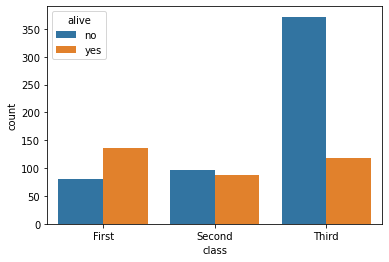

In [13]:
sns.countplot(data=df, x="class", hue="alive")

## 6. barplot을 그립니다. x축에는 class를 y축에는 fare를 그리고 alive 에 따라 다르게 색상을 표현해 주세요.
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0
dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAWkElEQVR4nO3de5RdZZnn8e9DLhQxDCEhAhK7K0CW
QwIIJCpgo2CYEBpGYIYmuBBQ5OI0tmEaCNhKFFc3LeCaHmHZjOEaUBtilMHVIgJRLqMCSSCEqxZy
s9IpSAJBEiChkmf+qM22CAkpUuecXVXn+1mr1tln7/fs/RwOqV+97977PZGZSJIEsFXVBUiS+g5D
QZJUMhQkSSVDQZJUMhQkSaXBVRfQGzvssEO2trZWXYYk9SsLFy5cnpmjN7atX4dCa2srCxYsqLoM
SepXIuK5TW1z+EiSVDIUJEklQ0GSVOrX5xQkqZbefPNN2tvbeeONN6oupSZaWloYM2YMQ4YM6fFr
DAVJKrS3t7PtttvS2tpKRFRdTq9kJitWrKC9vZ2xY8f2+HUOH0lS4Y033mDUqFH9PhAAIoJRo0a9
516PoSBJ3QyEQHjLlrwXQ0GSVDIUmsyMGTM46aSTmDFjRtWlSE2htbWV5cuXA3DggQdWXM3meaK5
yXR0dLBkyZKqy5Ca0m9+85uqS9gsewqSVCNHH300EydOZMKECcyaNesd24cPHw7A8ccfz89+9rNy
/ec+9znmzp3LunXrOPfcc/nIRz7C3nvvzfe+972G1f4WQ0GSauSaa65h4cKFLFiwgMsuu4wVK1Zs
tN20adOYM2cOAGvXrmXevHkcccQRXH311Wy33XbMnz+f+fPnc+WVV/LMM8808i04fCRJtXLZZZdx
8803A/DHP/6Rtra2jbY7/PDDmT59OmvWrOG2227jE5/4BNtssw233347ixcvZu7cuQC88sortLW1
vaf7DHrLUJCkGrjrrru48847+e1vf8uwYcM4+OCDN3mPQEtLCwcffDC/+MUvuOmmmzj++OOBrhvO
Lr/8cg477LBGlv42Dh9JUg288sorbL/99gwbNownn3yS++67713bT5s2jWuvvZZ7772XqVOnAnDY
YYdxxRVX8OabbwLw+9//ntWrV9e99u4MBUmqgalTp9LZ2ckee+zB+eefz/777/+u7adMmcLdd9/N
oYceytChQwE49dRTGT9+PPvttx977rknZ5xxBp2dnY0ov+TwkSTVwNZbb83Pf/7zd6x/9tlny+VV
q1aVy0OGDOGll156W9utttqKiy66iIsuuqhudW6OPQVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSV
vCRVkjZh4rnX13R/Cy89qab7qwd7CpKkUt1CISKuiYgXI+LRbutGRsQdEdFWPG5frI+IuCwinoqI
xRGxX73qkqS+6tlnn2WPPfbgtNNOY8KECUyZMoXXX3+dRYsWsf/++7P33ntzzDHH8PLLL9ethnr2
FK4Dpm6w7nxgXmaOA+YVzwEOB8YVP6cDV9SxLknqs9ra2jjzzDN57LHHGDFiBD/+8Y856aSTuPji
i1m8eDF77bUXF154Yd2OX7dQyMx7gJc2WH0UMLtYng0c3W399dnlPmBEROxcr9okqa8aO3Ys++yz
DwATJ07kD3/4AytXruSTn/wkACeffDL33HNP3Y7f6HMKO2bm0mK5A9ixWN4F+GO3du3FuneIiNMj
YkFELFi2bFn9KpWkCmy99dbl8qBBg1i5cmVDj1/ZiebMTCC34HWzMnNSZk4aPXp0HSqTpL5ju+22
Y/vtt+fee+8F4IYbbih7DfXQ6EtSX4iInTNzaTE89GKxfgnwwW7txhTrJKkyfeUS0tmzZ/PFL36R
1157jV133ZVrr722bsdqdCj8FDgZ+FbxeEu39V+KiBuBjwGvdBtmkqSm0NrayqOPlhdscs4555TL
m/vSnlqpWyhExL8BBwM7REQ78HW6wmBORHwBeA44rmh+K/DXwFPAa8Dn61WXJGnT6hYKmfmZTWya
vJG2CZxZr1okST3jHc2SpJKhIEkqOSFeH/b8N/eq+T47XxoJDKbzpefqsv+/mPlIzfcpqXHsKUiS
SvYUJGkTat2b7g89aXsKkqSSPQVJ6iNmzpzJyJEjOeusswD46le/yvvf/37Wrl3LnDlzWLNmDccc
cwwXXnghq1ev5rjjjqO9vZ1169ZxwQUXMG3atF7XYE9BkvqIU045heuv7/q2t/Xr13PjjTey0047
0dbWxgMPPMCiRYtYuHAh99xzD7fddhsf+MAHePjhh3n00UeZOnXDbyrYMvYUJKmPaG1tZdSoUTz0
0EO88MIL7LvvvsyfP5/bb7+dfffdF4BVq1bR1tbGQQcdxNlnn815553HkUceyUEHHVSTGgwFSepD
Tj31VK677jo6Ojo45ZRTmDdvHl/5ylc444wz3tH2wQcf5NZbb+VrX/sakydPZubMmb0+vqEgSX3I
Mcccw8yZM3nzzTf54Q9/yODBg7ngggs44YQTGD58OEuWLGHIkCF0dnYycuRIPvvZzzJixAiuuuqq
mhzfUJCkTajiEtKhQ4dyyCGHMGLECAYNGsSUKVN44oknOOCAAwAYPnw43//+93nqqac499xz2Wqr
rRgyZAhXXFGbbzE2FCSpD1m/fj333XcfP/rRj8p106dPZ/r06W9rt9tuu3HYYYfV/PhefSRJfcTj
jz/O7rvvzuTJkxk3blwlNdhTkKQ+Yvz48Tz99NOV1mBPQZK66fp6l4FhS96LoSBJhZaWFlasWDEg
giEzWbFiBS0tLe/pdQ4fSVJhzJgxtLe3s2zZsqpLqYmWlhbGjBnznl5jKEhSYciQIYwdO7bqMirl
8JEkqWQoSJJKhoIkqWQoSJJKhoIkqWQoSJJKhoIkqWQoSJJKhoIkqeQdzU1mh5b1QGfxKElvV0ko
RMT/BE4FEngE+DywM3AjMApYCJyYmWurqG8gO2fvlVWXIKkPa/jwUUTsAnwZmJSZewKDgOOBi4F/
yczdgZeBLzS6NklqdlWdUxgMbBMRg4FhwFLgU8DcYvts4OiKapOkptXwUMjMJcC3gefpCoNX6Bou
WpmZnUWzdmCXjb0+Ik6PiAURsWCgTG8rSX1FFcNH2wNHAWOBDwDvA6b29PWZOSszJ2XmpNGjR9ep
SklqTlWcaD4UeCYzlwFExE+AjwMjImJw0VsYAyypoLb3bMaMGXR0dLDTTjtxySWXVF2OJPVKFecU
ngf2j4hhERHAZOBx4FfAsUWbk4FbKqjtPevo6GDJkiV0dHRUXYok9VoV5xTup+uE8oN0XY66FTAL
OA/4+4h4iq7LUq9udG2S1OwquU8hM78OfH2D1U8DH62gHElSwWkuJEklQ0GSVDIUJEklQ0GSVDIU
JEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEkl
Q0GSVDIUJEklQ0GSVDIUJEklQ0GSVBpcdQGNMvHc6+uy322Xv8og4Pnlr9b8GDdvW9PdSdJm2VOQ
JJUMBUlSyVCQJJUMBUlSyVCQJJV6FAoR8VcR8flieXREjO3NQSNiRETMjYgnI+KJiDggIkZGxB0R
0VY8bt+bY0iS3rvNhkJEfB04D/hKsWoI8P1eHvc7wG2Z+Z+BDwNPAOcD8zJzHDCveC5JaqCe9BSO
AT4NrAbIzP8AtvgK+ojYDvgEcHWxv7WZuRI4CphdNJsNHL2lx5AkbZmehMLazEwgASLifb085lhg
GXBtRDwUEVcV+9wxM5cWbTqAHTf24og4PSIWRMSCZcuW9bIUSVJ3PQmFORHxPWBERJwG3Alc2Ytj
Dgb2A67IzH3p6oG8baioewhtKDNnZeakzJw0evToXpQhSdrQZqe5yMxvR8R/Af4EfAiYmZl39OKY
7UB7Zt5fPJ9LVyi8EBE7Z+bSiNgZeLEXx5AkbYF3DYWIGATcmZmHAL0JglJmdkTEHyPiQ5n5O2Ay
8HjxczLwreLxllocT5LUc+8aCpm5LiLWR8R2mflKDY/7d8APImIo8DTwebqGsuZExBeA54Djang8
SVIP9GSW1FXAIxFxB8UVSACZ+eUtPWhmLgImbWTT5C3dpySp93oSCj8pfiRJA1xPTjTP3lwbSdLA
sNlQiIhxwD8D44GWt9Zn5q51rEuSVIGe3KdwLXAF0AkcAlxP76e5kCT1QT0JhW0ycx4QmflcZn4D
OKK+ZUmSqtCTE81rImIroC0ivgQsAYbXtyxJUhU22VOIiBuKxf8LDAO+DEwETqTr5jJJ0gDzbj2F
iRHxAeAEuuY6eg04uyFVSZIq8W6h8H/o+l6DXYGFQNA1Sd1bj159JEkDzCaHjzLzsszcA7gmM3fN
zLHdHxtYoySpQTZ79VFm/o9GFCJJql5Prj7Su1g/9H1ve5Sk/sxQ6KXV46ZUXYIk1UxPbl6TJDUJ
Q0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GS
VDIUJEklQ0GSVKosFCJiUEQ8FBH/XjwfGxH3R8RTEXFTRAytqjZJalZV9hSmA090e34x8C+ZuTvw
MvCFSqqSpCZWSShExBjgCOCq4nkAnwLmFk1mA0dXUZskNbOqegr/G5gBrC+ejwJWZmZn8bwd2GVj
L4yI0yNiQUQsWLZsWf0rlaQm0vBQiIgjgRczc+GWvD4zZ2XmpMycNHr06BpXJ0nNbXAFx/w48OmI
+GugBfhPwHeAERExuOgtjAGWVFCbJDW1hvcUMvMrmTkmM1uB44FfZuYJwK+AY4tmJwO3NLo2SWp2
fek+hfOAv4+Ip+g6x3B1xfVIUtOpYviolJl3AXcVy08DH62yHklqdn2ppyBJqpihIEkqGQqSpJKh
IEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkq
GQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqDa66AEk9N2PGDDo6Othpp5245JJLqi5HA5ChIPUj
HR0dLFmypOoyNIA5fCRJKtlTUNNyKEZ6J0NBTcuhGOmdDAWpDp7/5l512W/nSyOBwXS+9FzNj/EX
Mx+p6f7UPzX8nEJEfDAifhURj0fEYxExvVg/MiLuiIi24nH7RtcmSc2uihPNncDZmTke2B84MyLG
A+cD8zJzHDCveC5JaqCGh0JmLs3MB4vlV4EngF2Ao4DZRbPZwNGNrk2Sml2ll6RGRCuwL3A/sGNm
Li02dQA7buI1p0fEgohYsGzZsobUKUnNorITzRExHPgxcFZm/ikiym2ZmRGRG3tdZs4CZgFMmjRp
o2008Ew89/qa73Pb5a8yCHh++as13//N29Z0d6UdWtYDncWjVHuVhEJEDKErEH6QmT8pVr8QETtn
5tKI2Bl4sYrapL7snL1XVl2CBrgqrj4K4Grgicz8X902/RQ4uVg+Gbil0bVJUrOroqfwceBE4JGI
WFSs+wfgW8CciPgC8BxwXAW1SVJTa3goZOb/A2ITmyc3shZJ0ts5IZ4kqeQ0F5LUAP1lAkZDQU1r
/dD3ve1Rqqf+MgGjoaCmtXrclKpLUC/0l7+8+xtDQVK/1F/+8u5vPNEsSSrZU5BUV/WYogTqPU3J
pTXdH9T3uzCgdt+HYU9BklQyFCRJJYePJPVLXlJcH4aCpH6pv11S3F+mPTcUJKkB+su0555TkCSV
DAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJ
UslQkCSVDAVJUslQkCSV+lQoRMTUiPhdRDwVEedXXY8kNZs+EwoRMQj4LnA4MB74TESMr7YqSWou
fSYUgI8CT2Xm05m5FrgROKrimiSpqURmVl0DABFxLDA1M08tnp8IfCwzv7RBu9OB04unHwJ+19BC
G2sHYHnVRWiL+Nn1bwP98/vLzBy9sQ2DG11Jb2XmLGBW1XU0QkQsyMxJVdeh987Prn9r5s+vLw0f
LQE+2O35mGKdJKlB+lIozAfGRcTYiBgKHA/8tOKaJKmp9Jnho8zsjIgvAb8ABgHXZOZjFZdVtaYY
Jhug/Oz6t6b9/PrMiWZJUvX60vCRJKlihoIkqWQoVCAi1kXEom4/rRExKSIuew/7GBERf1vPOptZ
RHw1Ih6LiMXFZ/SxBh//4Ij490Yec6CKiFHd/q11RMSSYnllRDy+idd8MyIO7cG+WyPi0dpXXZ0+
c6K5ybyemftssO5ZYMGGDSNicGZ2bmQfI4C/Bf619uU1t4g4ADgS2C8z10TEDsDQisvSFsrMFcA+
ABHxDWBVZn47IlqBjQZvZs7c2PqIGJSZ6+pTad9gT6GP6P6XYUR8IyJuiIhfAzdExISIeKD462Zx
RIwDvgXsVqy7tNLiB56dgeWZuQYgM5dn5n9ExMSIuDsiFkbELyJiZ4CI2D0i7oyIhyPiwYjYLbpc
GhGPRsQjETGtaHtwRNwVEXMj4smI+EFERLFtarHuQeC/VfXmm8ygiLiy6BXeHhHbAETEdcUsC0TE
sxFxcfG5/E3x/8HDEfEwcGaVxdeDoVCNbbp1Z2/eRJvxwKGZ+Rngi8B3it7FJKAdOB/4Q2buk5nn
NqbspnE78MGI+H1E/GtEfDIihgCXA8dm5kTgGuCfivY/AL6bmR8GDgSW0vVLfR/gw8ChwKVvhQiw
L3AWXZ/xrsDHI6IFuBL4r8BEYKcGvE/BOLo+uwnASuC/b6LdiszcLzNvBK4F/q74vAcch4+qsbHh
ow39NDNfL5Z/C3w1IsYAP8nMtuKPS9VBZq6KiInAQcAhwE3APwJ7AncU/+0HAUsjYltgl8y8uXjt
GwAR8VfAvxVDDS9ExN3AR4A/AQ9kZnvRbhHQCqwCnsnMtmL99/nzHF+qn2cyc1GxvJCuz2JjboKu
c3nAiMy8p1h/A10zOw8YhkLftfqthcz8YUTcDxwB3BoRZwBPV1ZZEyh+md8F3BURj9A1TPBYZh7Q
vV0RCu/Vmm7L6/DfYZU2/Cy22US71ZtYP+A4fNQPRMSuwNOZeRlwC7A38CqwJb+QtBkR8aHivM1b
9gGeAEYXJ6GJiCERMSEzXwXaI+LoYv3WETEMuBeYFhGDImI08AnggXc57JNAa0TsVjz/TI3flmog
M1cCK4ueIMAJVdZTD4ZC/3Ac8Ggx1LAncH1xRcWvixOZnmiureHA7Ih4PCIW0zX2PxM4Fri4OMG4
iK7zBwAnAl8u2v6GrvMBNwOLgYeBXwIzMrNjUwcshp1OB35WnNB8sS7vTLXweeC7xb/HATeO6zQX
kqSSPQVJUslQkCSVDAVJUslQkCSVDAVJUslQkLZQMUfVOVXXIdWSoSBJKhkKUg9FxEnFLLUPR8QN
G2w7LSLmF9t+XNzVTET8TXGD4cMRcU+xbmOz3kp9gjevST0QERPoukv5wMxcHhEjgS/z57n5RxV3
mRMR/wi8kJmXF/MmTc3MJRExIjNXRsTlwH2Z+YOIGAoM6jb5oVQpewpSz3wK+FFmLgfIzJc22L5n
RNxbhMAJwIRi/a+B6yLiNLpmVoWuWW//ISLOA/7SQFBfYihItXEd8KXM3Au4EGgByMwvAl8DPggs
LHoUPwQ+DbxO16y3n6qmZOmdDAWpZ35J17dujQIoho+625au71cYQreZMyNit8y8v/h6x2V0fXnP
xma9lfoE53GXeiAzH4uIfwLujoh1wEN0fa/2Wy4A7qfrF//9/Hla80uLE8kBzKNr1tTzgBMj4k2g
A7ioIW9C6gFPNEuSSg4fSZJKhoIkqWQoSJJKhoIkqWQoSJJKhoIkqWQoSJJK/x8rNlJrt6t92gAA
AABJRU5ErkJggg==
">

<AxesSubplot:xlabel='class', ylabel='fare'>

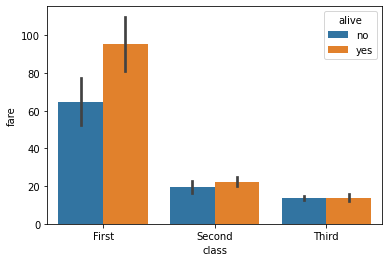

In [15]:
sns.barplot(data=df,x="class", y="fare", hue="alive")

## 7. pointplot 을 그립니다. x축에는 deck 을 y축에는 fare를 그립니다. alive 에 따라 다른 색상으로 표현해 주세요.
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0
dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3dd3hUZfbA8e+ZVGpooZcA0ouUUAVE
UQEbYAWlCYioqKtrXV3d6rqW37roWkA6CqjYRRAFQaWGrvROqCHU9GTm/f1xJ2EC6ZmZm0nO53nm
mTvvLXMGkpy5977vecUYg1JKKQXgsDsApZRSJYcmBaWUUlk0KSillMqiSUEppVQWTQpKKaWyBNsd
QHHUqFHDREVF2R2GUkoFlPXr158yxkTmtC6gk0JUVBQxMTF2h6GUUgFFRA7mtk4vHymllMqiSUEp
pVQWTQpKKaWyBPQ9BaWU8qb09HRiY2NJSUmxOxSvCA8Pp379+oSEhBR4H58lBRGZBtwMnDTGtHW3
zQdauDepApw1xnQQkShgO7DTvW61MWaCr2JTSqmcxMbGUqlSJaKiohARu8MpFmMM8fHxxMbG0rhx
4wLv58szhRnA28CszAZjzN2ZyyLyBnDOY/u9xpgOPoxHKaXylJKSUioSAoCIUL16deLi4gq1n8+S
gjFmhfsM4DJi/YvfBVzrq/dXSqmiKA0JIVNRPotdN5p7AyeMMbs92hqLyEYRWS4ivXPbUUTGi0iM
iMQUNgOWKbMGw6RO1rNSShWQXUlhGDDX4/UxoKExpiPwBPCRiFTOaUdjzGRjTLQxJjoyMscBeQrg
7CE4vdd6VkrZJioqilOnTgHQs2dPm6PJn9+TgogEA7cB8zPbjDGpxph49/J6YC/Q3N+xKaWUL61c
udLuEPJlx5nCdcAOY0xsZoOIRIpIkHu5CdAM2GdDbEopVWSDBw+mc+fOtGnThsmTJ1+2vmLFigAM
HTqUb7/9Nqt99OjRfPrppzidTp566im6dOlC+/btef/99/0WeyafJQURmQusAlqISKyIjHWvGkr2
S0cAfYAtIrIJ+BSYYIw57avYlFLKF6ZNm8b69euJiYlh0qRJxMfH57jd3XffzccffwxAWloaP/74
IzfddBNTp04lIiKCdevWsW7dOqZMmcL+/fv9+RF82vtoWC7to3NoWwAs8FUsSinlD5MmTeLzzz8H
4PDhw+zevTvH7QYOHMhjjz1GamoqixYtok+fPpQrV47vv/+eLVu28OmnnwJw7tw5du/eXahxBsWl
I5qVUsoLfvrpJ3744QdWrVpF+fLl6du3b64jo8PDw+nbty+LFy9m/vz5DB06FLAGnL311lv079/f
n6Fno7WPlFLKC86dO0fVqlUpX748O3bsYPXq1Xluf/fddzN9+nR+/vlnBgwYAED//v159913SU9P
B2DXrl0kJib6PHZPmhSUUsoLBgwYQEZGBq1ateLZZ5+le/fueW5/ww03sHz5cq677jpCQ0MBGDdu
HK1bt6ZTp060bduWBx54gIyMDH+En0UvHymllBeEhYXx3XffXdZ+4MCBrOWEhISs5ZCQEE6fzt6f
xuFw8PLLL/Pyyy/7LM786JmCUkqpLJoUlFJKZdGkoJRSKosmBaWUUlk0KSillMqiSUEppVQW7ZKq
lFJFkJCawRcbj7D+4BlCgxz0a1WTfq1qEeQI7El6NCkopVQh7Th+npFT13LyQmpW2/yYw3SJqsrU
0V2oHB5iY3TFo5ePlFKqENKdLsbNjMmWEDKtO3CGl778vVjHP3DgAK1ateL++++nTZs23HDDDSQn
J7Np0ya6d+9O+/btGTJkCGfOnCnW++RGk4JSShXCj9tPEHsmOdf1X28+SlwOCaMwdu/ezcMPP8zv
v/9OlSpVWLBgASNHjuTf//43W7ZsoV27dvz1r38t1nvkRpOCUkoVwraj5/Ncn+Ey7D55oVjv0bhx
Yzp06ABA586d2bt3L2fPnuXqq68GYNSoUaxYsaJY75EbTQpKKVUIlQpwv6C49xTCwsKyloOCgjh7
9myxjlcYmhSUUqoQBrarTV79ixrXqEDrOpW9+p4RERFUrVqVn3/+GYDZs2dnnTV4m/Y+UkqpQqhf
tTwT+jbl3Z/2XrYuSIQ/39wKhw+6pc6cOZMJEyaQlJREkyZNmD59utffAzQpKKVUoT3dvwV1I8J5
f8W+rJvOnRpW4Y83tOCqK2oU69hRUVH89ttvWa+ffPLJrOX8Ju7xBk0KSilVSCLCiB5R3NutEScu
pBAa5KB6xbD8dwwAmhSUUqqIHA6hTkQ5u8PwKp/daBaRaSJyUkR+82j7i4gcEZFN7seNHuueE5E9
IrJTROybtVoppcowX/Y+mgEMyKH9P8aYDu7HQgARaQ0MBdq493lHRIJ8GJtSSqkc+CwpGGNWAKfz
3dAyCJhnjEk1xuwH9gBdfRWbUkqpnNkxTmGiiGxxX16q6m6rBxz22CbW3XYZERkvIjEiEhMXF+fr
WJVSqkzxd1J4F2gKdACOAW8U9gDGmMnGmGhjTHRkZKS341NKqYJJvQDrpsJn4+HLibDjW3A57Y6q
2Pza+8gYcyJzWUSmAN+4Xx4BGnhsWt/dppRSJc+J32H2bZBw/GLbxtnQsAfcMx/CI+yLrZj8eqYg
InU8Xg4BMnsmfQUMFZEwEWkMNAPW+jM2pZQqEGc6zB2aPSFkOrQKFj5V5EO/+OKLvPnmm1mvn3/+
ef773//y2muv0aVLF9q3b89LL70EQGJiIjfddBNXXnklbdu2Zf78+UV+X0++7JI6F1gFtBCRWBEZ
C7wqIltFZAtwDfA4gDHmd+BjYBuwCHjYGBP452FKqdJn53dw9lDu639bAAkni3ToMWPGMGvWLABc
Lhfz5s2jdu3a7N69m7Vr17Jp0ybWr1/PihUrWLRoEXXr1mXz5s389ttvDBiQU2fPwvPZ5SNjzLAc
mqfmsf0/gX/6Kh6llPKK41vzXu/KgLgdULFmoQ8dFRVF9erV2bhxIydOnKBjx46sW7eO77//no4d
OwKQkJDA7t276d27N3/84x955plnuPnmm+ndu3dRPs1ldESzUkoVRngBKqCGFb1K6rhx45gxYwbH
jx9nzJgx/Pjjjzz33HM88MADl227YcMGFi5cyAsvvEC/fv148cUXi/y+mbR0tlJKFUbrQZBX8exq
TaF2+yIffsiQISxatIh169bRv39/+vfvz7Rp00hISADgyJEjnDx5kqNHj1K+fHmGDx/OU089xYYN
G4r8np70TEEppQqjSkPo9Qf45T+Xr5MgGPAvcBT9+3ZoaCjXXHMNVapUISgoiBtuuIHt27fTo0cP
ACpWrMicOXPYs2cPTz31FA6Hg5CQEN59990iv6cnTQpKKVVY/V6CyvVg5aSLN53rd4Vrn4cmfYt1
aJfLxerVq/nkk0+y2h577DEee+yxbNs1bdqU/v29XyZOk4JSShWWCHS9H6LHwoVjEBwGFYo3jwLA
tm3buPnmmxkyZAjNmjXzQqCFp0lBKaWKyuGAiBwr8hRJ69at2bdvn9eOVxR6o1kppTwYY+wOwWuK
8lk0KSillFt4eDjx8fGlIjEYY4iPjyc8PLxQ++nlI6WUcqtfvz6xsbGUlgrM4eHh1K9fv1D7aFIo
jZwZ4Ex1vwj8bzxK+UtISAiNGze2Owxb6eWj0mb9DHizHZyLtV6fOQDLXwOXy86olFIBQs8USpO1
U2Dhk9nbjAuW/QNSzkJ/LS2llMqbnimUFunJsPQfua9f/S6c0ykqlFJ506RQWhxcaZ0N5MY4Ydci
/8WjlApIevmotMhI8c42JcSIqWuIPZNM/arlmD22m93hKFVmaFIoLep2tIpx5TU3UbUm/ounmGLP
JLP/VKLdYShV5ujlo9Kicl1od0fe23z9B4iN8U88SqmApEmhNOn/MgSFXt4e7B7RmHAcpg+EjXP8
G5dSKmBoUihNdnwLzjRrOSjMeq5UB57cDa1utV470+DLh+G7Z6wJyJVSyoMmhdLC5YKVb1nL4oBK
tazlkPLW9IF3zYJrXyBrxqg178HsIZAYb0u4SqmSyWdJQUSmichJEfnNo+01EdkhIltE5HMRqeJu
jxKRZBHZ5H6856u4Sq3diyF+t7Xc6lZwhGRfLwJ9noJhcyG0ktV24GeY0jf/iciVUmWGL88UZgAD
LmlbArQ1xrQHdgHPeazba4zp4H5M8GFcpVPmWQJAz0dz367FQLj/R2seWbBmjZp6A/z2mW/jU0oF
BJ8lBWPMCuD0JW3fG2My3C9XA4Ur36dyFrseDv5qLTe6Cup3znv7yBZw/1K44nrrdXoSfHof/PBX
cOXRpVUpVerZeU9hDPCdx+vGIrJRRJaLSO/cdhKR8SISIyIxpaW8bbGtnHRxuecjBdunXBW4Zz70
evxi2y//B3OHQco578anlAoYtiQFEXkeyAA+dDcdAxoaYzoCTwAfiUjlnPY1xkw2xkQbY6IjIyP9
E3BJdno/bP/KWq7RHJoVYiJvRxBc9xe4YxoEl7Padi+GKddC3C5vR6qUCgB+TwoiMhq4GbjXuKc3
MsakGmPi3cvrgb1Ac3/HFpBWv2NVQgXoMdGaM7aw2t4OY7+HiIbW6/g98EE/2Km1kpQqa/yaFERk
APA0cKsxJsmjPVJEgtzLTYBmgL2zVweCpNMXB6JVqAnt7y76seq0h/HLIMp95S71PMwdCiteh1Iw
NaFSqmB8VvtIROYCfYEaIhILvITV2ygMWCIiAKvdPY36AH8TkXTABUwwxpzO8cDqonVTrZvEAN3G
Q0jh5mK9TIUaMOJzWPw8rH0fMLD073B8Cwx6B8IqFjvkgno1+SWqhx4nPrk2sNxv76tUWeezpGCM
GZZD89Rctl0ALPBVLKVSeor7DzfWALXosd45blAI3PiqdebwzePWCOhtX0L8Xhj6IVSN8s775KO2
6yQNHMcJcen4SqX8SX/jAtWWeZDo7n3VcQSUr+bd43ccDqMXQsXa1usTv8Hka2CffmtXqjTTpBCI
XC5Y+ba1LA7o8ZBv3qdBFxj/E9SLtl4nn7ZKY6x+V+8zKFVKaVIIRLsWXSxp0XqQby/pVK4Do7+F
DsOt18YJi56FLx6yLmEppUoVTQqBKFtJiwIOViuOkHAY9DYMfM2ayAdg80cw40Y4f9T376+U8htN
CoEmNgYOrbSWG10F9fIpaeEtIlYPp5FfQDn3/Ysj62FyXzi81j8xKKV8TpNCoMlW0iKPwne+0riP
dZ+hVjvrdcIJmHETbJjl/1iUUl6nSSGQnN4H27+2lms0h2Y32BNH1UYwdjG0GWK9dqbBV4/At0/q
xD1KBThNCoFklUdJi56PFK2khbeEVoA7pkO/l8iauGfdFJg1GBJP2ReXUqpYNCkEiktLWrS7y954
wLrP0PsJuOdjCIuw2g7+Yt1nOLbZ1tCUUkWjSSFQrPsAMpKt5W4PFL+khTc1v8GauKeGu4bhucMw
tT9s/dTeuJRShaZJIRCkp8Aaz5IWY+yNJyc1msG4H6C5e7K9jGRYMBaWvKgT9ygVQDQpBILNcyHJ
fZ3eFyUtvCU8AobOhd5PXmz79b/w0V2QfMa+uJRSBaZJoaRzuWCVH0paeIvDAf3+DHfOtM5qAPb8
YE3cc3KHvbEppfKlSaGk2/WdNekN+L6khTe1GQxjl0CVRtbr0/vgg+tgx0J741JK5UmTQkmXraSF
DYPViqN2W2ugW+M+1uu0CzBvGCx/1ToDUkqVOJoUSrLD6+DQKmu5US+o18neeIqifDUY/jl097js
teyf8MlISE2wLy6lVI40KZRkniUtrgqwswRPQcEw4F8w+D0ICrPatn8NU6+3LisppUoMTQolVbaS
Fi3giuvtjccbOgyD+76DSnWt1ye3WRP37F1mb1xKqSyaFEqqVf8D3BPZ2F3Swpvqd7buMzToZr1O
OQtzbrMmDdKJe5SyXSn5S1PKJMbDxg+t5Qo1oX0JKGnhTZVqwaivodMo67VxwffPw+cPQGoCGTsX
E2HOAxBKmo2BKlX2aFIoiS4taREcZm88vhAcBrf8F256AxzBVtuW+aT/uwnBc++iMtZN6FrmFMcn
3wHpyTYGq1TZ4dOkICLTROSkiPzm0VZNRJaIyG73c1V3u4jIJBHZIyJbRCQAu9p4QXoyrJ1sLYdU
KJklLbxFBLqMg5FfQfkaAIS4UrNtYgzUPrqE/R8+ZkeESpU5vj5TmAEMuKTtWeBHY0wz4Ef3a4CB
QDP3Yzzwro9jK5k8S1p0KsElLbwp6ipO9f5bjqvEXZW73oEFZFyI82NQSpVNPk0KxpgVwOlLmgcB
M93LM4HBHu2zjGU1UEVE6vgyvhLH5bJuuIJV0qJ7CS9p4UUH9mzLc30oGezbutJP0ShVdtlxT6GW
MeaYe/k4UMu9XA847LFdrLstGxEZLyIxIhITF1fKvjnu+g5O77WWWw+2ZjgrI1JMcL7bJLlC/BCJ
UmWbrTeajTGGrH6XBd5nsjEm2hgTHRkZ6aPIbPKr5/zLj9gXhw1C2twM5N4r9bwpR722vf0YkVJl
kx1J4UTmZSH380l3+xGggcd29d1tZcPhtXB4tbUc1TswS1oUQ8XazfnI2S/rHsJl6yWFarE/+Dco
pcogO5LCV4C7gzqjgC892ke6eyF1B855XGYq/VZ69yxha2IEh6UuWxMjin0sX9sXl8Co6Wv5c/po
3soYzHlTLmud01hZwoGxJu3ZuciuMJUqEwqUFESkl4jc516OFJHGBdxvLrAKaCEisSIyFngFuF5E
dgPXuV8DLAT2AXuAKUDZucsavxe2f2MtR7b0SkmLR0Neonfy6zwa8lKxj+VLR84mM/yDNZxKSMNJ
EBuvmMjym3/mGNWt9VKbd123ARBknDjnDdeyGEr5UL5390TkJSAaaAFMB0KAOcBV+e1rjBmWy6p+
OWxrgIfzO2ap5FnSosfE0lPSIh9xF1IZ8cEajp5LAaBHk+q8c28nwkOCOLwwDAyICM2H/osPPkph
XPBCgkw6zo+GETTyM2jU0+ZPoFTpU5C/PkOAW4FEAGPMUaCSL4MqUxJPwSZ3SYuKtUpfSYtcnEtO
Z+S0tew7lQjAlQ2qMGVUNOEhQZdt2691bcJufJk5GdZ3iSBnMs45d0Lser/GrFRZUJCkkObZS0hE
Kvg2pDJm3VTIsL4pl9qSFpdISstgzIx1bD9m1TdqUasSM+/rQsWw3E9cR/RszKEef+dTpzVhT1B6
Aq7ZQ+DYFr/ErFRZUZCk8LGIvI81mOx+4Aesa/6quMpSSQu31AwnD8xez/qDZwBoVL08s8d2pUr5
0Hz3fXZga5a3eJFvnN0BcKSewzVrsM79rJQX5ZsUjDGvA58CC7DuK7xojHkr771UgWQraTESylW1
Nx4fy3C6eHTuRn7ebX3m2pXDmTO2GzUrhxdof4dDeO3uTsyq8zxLnJ2ttuR4zKxB1s16pVSx5ZkU
RCRIRJYZY5YYY54yxjxpjFnir+BKNZfTo6RFEHR/0N54fMzlMjyzYCuLfz8BQLUKocwZ15UG1coX
6jjhIUG8N6o7r1V+lhXOdgBIwnHMrFvh7OF89lZK5SfPpGCMcQIuESn5nd0DzU6PkhZtSndJC2MM
f/tmGws2xAJQKSyYWWO6ckXNovVXqFYhlMn3XcWzIc+yxtUSADkXCzNvgfNlZ2iLUr5QkHsKCcBW
EZnqLm09SUQm5buXypuXB6uVZP+3ZBczVh4AIDzEwdTRXWhbr3jfM6JqVOCtUVfxoOsZNrqusBrP
7IdZg6weXUqpIilIUvgM+DOwAljv8VBFdWgNHF5jLUf1hrod7Y3Hhyav2MtbS/cAEBIkvDe8M10b
e6cceOdGVfnn3T0Ynf40v7vcZ1qndsKswZB8xivvoVRZk+/gNWPMzPy2UYWU7SzhUfvi8LG5aw/x
8kKrZ5BD4M27O9K3RU2vvsfAdnU4cmMXRnz7HPNC/05zxxE4sRXm3A4jvoDwyl59P6VKu3zPFESk
mYh8KiLbRGRf5sMfwZVK8Xthx7fWcmRLaFb8khYl0debj/Knz7dmvX7ltvbc1N4302OM7dWYW3q0
4960P7Hf5a7EfmQ9fHQ3pCX55D2VKq0KcvloOtYsaBnANcAsrDIXqig8S1r0fIRcy4IGsKU7TvD4
/E1ZZbBfuKkVd3VpkPdOxSAivHhLG65s1ZJ7054n1lhTe3JoJcy7B9JTfPbeSpU2BUkK5YwxPwJi
jDlojPkLcJNvwyqlspW0qA3t7rQ3Hh9YvS+eB+dsIMNlZYTH+jVjXO8mPn/fIIcwaVgHatRvyj1p
z3PcuMd87FsGn4yCjDSfx6BUaVCQpJAqIg5gt4hMFJEhQEUfx1U6rfugVJe02BJ7lnEzY0jNcAEw
5qrG/OG6Zn57//KhwUwd1QVXlSjuTfsTp4z7fsKuRfDZ/eDM8FssSgWqXJOCiMx2L34BlAceBToD
I7g4H4IqqLSkS0pa3GdvPF6268QFRk5bS0Kq9Yf3zs71eeGmVoifL49FVgpjxn1diAtrxIi05zhr
3KW6tn0BX0205sFWSuUqrzOFziJSF7gXq1x2EvBHYBywyw+xlS6b50JSvLXceVSpKmlxKD6J4R+s
4WxSOgA3tqvNK7e3x+Gw537JFTUrMXlkNHsdjRmZ9iwXMift2TwXvn0i9zk/lVJ5JoX3gB+Bllwc
mxDj8awKyuWEVaWzpMWJ8yncO3U1Jy+kAtCneST/ubsDQTYlhEzdm1TntTvbs8U05b60p0gy7kt1
66fD4j9pYlAqF7kmBWPMJGNMK2CaMaaJMaax57MfYwx8OxfCaXcv3jZDoEpDe+PxktOJaQz/YA2H
TycD0CWqKu8P70xY8OVzIthhUId6PNW/BTGmJfenP0GqCbFWrH4Hlv7D3uCUKqEKUiW19HyttctK
j6KypaSkxYWUdEZNW8vukwkAtKlbmamju1AutGQkhEwP9W3K0C4N+NXVjgnpfyA9c7zmz6/Ditft
DU6pEqhszPtoJ8+SFo37QN0O9sbjBSnpTsbOjGHrkXMANI2swKwxXakcHmJzZJcTEf4+uC19mkey
zNWRR9Im4sz8sV/6d1j1jr0BKlXCaFLwtVJW0iItw8WDc9azdv9pAOpVKceccd2oXrHkdq8NCXLw
zr2daFWnMotcXflj2gRcuO95LH4OYqbZG6BSJYgmBV86tcejpEUruOI6e+MpJqfL8MTHm1i2Mw6A
GhXD+HBcN+pElLM5svxVDAtm+ugu1IkI5wtXL/6UPvbiym+egE1z7QtOqRLE70lBRFqIyCaPx3kR
+YOI/EVEjni03+jv2LxudekpaWGM4fnPt/LNFmu+gohyIcwZ15WoGr6Zsvu4oyb7XLU57vBeAb3a
EeFMG23NBT3PeS1/TR/hXmPgy4fg98+99l5KBap8q6R6mzFmJ9ABrJndgCPA58B9wH/c038GvoQ4
2PSRtVyxNrS7w954isEYw8sLtzNvnTWzWfnQIGbc14WWtX1XgfTpcn9lf2IijStXYJkXj9uqTmXe
Hd6J+6avY7pzIOGk80zIPDAuWDAOgstBiwHFfp8RU9cQeyaZ+lXLMXtsNy9ErpR/2H35qB+w1xhz
0OY4vM+zpEX3CQFd0uLtpXuY8vN+AEKDHXwwKpqODQN38F3vZpG8fJs1lee7zlt523mbtcKVAR+P
gL1Li/0esWeS2X8qkdgzycU+llL+ZHdSGAp4XsydKCJbRGSaiOT4V0dExotIjIjExMXF+SfKwvIs
aRFaEToHbkmLGb/u540l1gD2IIfwv3s60bNpDZujKr67ohvw6LXWjG2vp9/OTG6xVjjTYO49cOBX
G6NTyj62JQURCQVuBT5xN70LNMW6tHQMeCOn/Ywxk40x0caY6MjISL/EWmibP4Jkq3cOnUZBuSr2
xlNEn66P5S9fbwOs2yH/d9eVXN+6ls1Rec/j1zfnto71AOGllKF8Huy+bJSRDB/dBbE6cF+VPXae
KQwENhhjTgAYY04YY5zGGBcwBehqY2xF53K650zAXdJigr3xFNGi347x9Kebs17/fVBbBnWoZ2NE
3icivHJ7e3o0qQ4ITyQM58cwdw+xtASYcxsc22JrjEr5m51JYRgel45ExHNariHAb36PyBt2fBvw
JS1W7IrjkbkbcU+JwDMDWjK8eyN7g/KR0GAH743oTLOaFTE4uP/caNZV6GutTDkHswfDyR22xqiU
P9mSFESkAnA98JlH86sislVEtmDN8Pa4HbEVW4CXtIg5cJoHZq8n3WllhAf7NuXBvk39Hkf9quVo
XKMC9av6fgxERLkQpt/XhchKYbhwMCx+DDsielsrk+Jh1iBrGlWlygC/d0kFMMYkAtUvaRuRy+aB
49BqiF1rLQdgSYvfj57jvhnrSE53AjC8e0Oe7t/Cllj83Y2zftXyTBvVhbveX0VyOtx6YhxL62ZQ
//QqSDhuJYb7FgbkmZ9ShWF376PSJdtZwmP2xVEEe+MSGDl1LRdSrElyBneoy99ubev3SXLs1K5+
BG/f0xGHQBohXH9sPKdrdLFWnjsMM2+F88cKdKxXk19iaegTvJr8kg8jVsr7NCl4i2dJi5qt4Yp+
9sZTCEfOJjPigzXEJ1rzGF/Xqhav3XmlbZPk2Klfq1r8dVBbAJJNGNcdf4jESPcZ35n91hlD4ql8
j1PbdZImjuPUdp30ZbhKeZ0mBW9Z9TaBWNIi7kIqwz9Yw9Fz1kC7nk2r8/Y9HQkJKrs/GiO6N+KB
PtaUIaczwrgx/nFSI61EwamdMGswJJ+xMUKlfKfs/uZ7U0KcNdUjQKU60DYwSlqcS0pnxNQ17D+V
CECHBlWYMjKa8JCSNSeCHZ4Z0JKb2lsd4g4mhXB30jM4q7vvr5zYCnNuh5TzNkaolG9oUvCGdVMu
lrToNgGCQ+2NpwASUzMYPWMtO45fAKBl7UrMuK8LFcJs6XtQ4jgcwht3Xkl0I2tg/ab4ICY4XsRV
1T3p4JH18NHdkJZoY5RKeZ8mheJKS4K1U6zl0IrQebSt4RRESrqT8bNj2HjoLABR1csza2xXqpQv
+cnMn8JDgpgyMprG7kqwSw4LL1V5GRPRwNrg0EqYdw+kp9gYpVLepUmhuDZ9GFAlLTKcLh6du5Ff
98QDUCcinDnjulGzUrjNkYv0G/EAAB6fSURBVJVMVSuEMuO+LlSrYCXM2dtdvB/1pnWZEGDfT/DJ
KMhIsy9IpbxIk0JxXFbSomRPZ+1yGZ7+dAvfbzsBQPUKocwe2436VcvbHFnJ1qh6BT4YFU1YsPXr
8sqaVL7u8B6UdxcG3LUIPrsfnBk2RqmUd2hSKI4d31jdFAHa3gZVGtgbTx6MMfzl69/5bOMRACqF
BTNzTFeuqFnR5sgCQ6eGVfnv0A5Zncoe+yGRtX2mQ7j7zHDbF/Dlw+By2RekUl6gSaGojIFfPedf
LtklLV7/fiezVlnTVoSHOJh2Xxfa1ouwOarAMqBtHZ6/sRUALgOjFyaxd8BsCK1kbbBlHnw2Dr7/
M5HGujxXjmTrjDLQzBoMkzpZz6pM0aRQVIdWwxF3aeXGV0OdK+2Nx0NKujOrVIXLZXhv+V7+t8yq
3RMSJLw/IpouUdXsDDFgje3VmNE9owBISnMy9Ns04gbNgRD3JbjfFsDKSYSTCkANcwY+vDPwbkaf
PQSn91rPqkzRpFBUniUtrnrUvjg8GGP44Od9dH/5R467B6MdPJ3EK99ZVT4dApOGduTq5iV0HooA
ICL8+ebWWfNKxF1I5d7vhcQBb+a4vQHY+yMsf8V/QSpVDJoUiuLUbti50Fqu2RqaloySFlN+3sc/
vt3O2eT0HNe/cnt7Brark+M6VXBBDmHS0I5cWd+6/LbrRALf/fRzjttmjWtfPwOcOf+/lETHzqdk
e1ZlhyaF3OR1TbUElrRISstg0o978tzGmkxGeUO50CA+GNWFBtWs0t5hZ3fnvUPyGVjzPlw44Yfo
ii/DXTo981mVHZoUcpPbNdWEONhU8kparN1/moTUvLtE/rRTi7N5U2SlMKaP7kpEuRDOmEr57/D9
8/BGc3i/Dyz9BxxaE5g3oVWppkmhsNZOBqd1E7EklbQ4n5x/H/k0/dbndVfUrMjkEZ35ll6A1Skt
X8c2w4rXYNoN8FpT+HQMbJ5nfeFQymZa6KYw0pKsOkdgdUOMvs/eeIDUDCcfrj7EpKX5XL4AukRV
9UNEZU+3JtUZOuR25n++jLuDf7ps/WlTkaP93qZt6HHY/T0c+AWc7hHQyWesHku/LQAE6naEZjdA
s+utZYcWJ1T+pUmhMDZ9eLFkcudREG5fP3+Xy/Dl5iO88f0uYs8k57t9z6bVaV+/ZJfgCGThocE8
kTGO7aYho4MWE+Ww7h1cMOEMTvs7kb/XYsGDQ6xR72mJsP9nK0HsWeJxidLA0Q3WY/krUK4aXHGd
lSCa9oMKek9I+Z4mhYJyOd03mAFHsG0lLYwx/LQrjlcX7WT7sYulm0ODHAzr2oCjZ1NYsj37zcyu
javxv3s6+TvUMuWH7ScxOJjhHMAMZ39+Cn2CKMcJ4kwVDplaHDp4ht0nLtCsViUIrQAtBlgPY+DU
Lti9xEoSB1eCy91LKfk0bP3YeiBQr/PFs4g6HcChV3+V92lSKKjtX8OZA9Zym9sgor7fQ9h0+Cyv
fLed1ftOZ7WJwJAO9Xj8+uY0qGYNoNpx/DzDJq/mTFI6dSLCmT++e5maVtMOGdnKWwguLv/3vv4/
K2gaWYHuTarTvUl1ujWpZhUijGxhPXpOhNQLsH+FO0ksgfOx7r2NNVjySAz89DJUiLTOIq64Dppe
C+V1MKLyDtuSgogcAC4ATiDDGBMtItWA+UAUcAC4yxhj/xRXxsBK+0pa7I1L4PXFO/nut+PZ2q9p
EcnTA1rSqk7lbO0ta1emSvlQziSlEx4SpAnBD6IbVeXLTUfz3W5vXCJ74xL5cI11yejyJFEJWt5k
PYyBuB3WGcTuJXBoFbjcHQoS3RM7bZ4L4oD6XawziCuuh9rt9SxCFZndZwrXGGM8J7x9FvjRGPOK
iDzrfv2MPaF5OLTamlQFoElfqNPeL2978nwKb/64m/nrDuN0XezW0qFBFZ4d2JLuOu6gxBjSqT5v
L9vDifOpOa6/qV0dUjNcrN0fz/mUiz3FLk0STTySRPfG1ahZsxXUbAVXPWbN9LZ/uTtJ/AAX3EnI
uODwGuux9B9QsdbFexFNrinx5dxVyWJ3UrjUIKCve3km8BMlISn4+SzhfEo67y/fy9Rf9pOSfvGy
RJMaFXh6QAv6t6mt3/5LmIphwcwa0437Z8Vw6HRStnWP9WvGH65rhojgdBm2HzvP6n3xrN53+rIk
sS8ukX1xiXyUW5JodQu0usU6izjxu/tm9Q/WFxfjHvOQcMLqFLHpQ6uke4Nu0Ow691lEuxIx2FKV
XGIK1LHaB28ssh84gzU0+H1jzGQROWuMqeJeL8CZzNc5iY6ONjExMb4JcFIna/BaREM45+4dUrMN
PPirz36pUtKdzFl9kLeX7eFs0sWSCDUrhfH49c25s3N9goMKdlngmtd/Yv+pRBrXqMCyJ/v6JF51
uQyni2U742j+8dU04hiHpQ4NXtqR6/b5JYlLXZYkKrsnR0o+a034s3uJ1aMpIZeR05XqeJxF9M3e
gy4jDVa/AxtmYk7vQ4DzVKTyczsgrACD81TAEJH1xpjonNbZeabQyxhzRERqAktEJNtvjjHGiMhl
GUtExgPjARo2bOj7KFPOXlz2UUkLp8vwxcYj/N+SXRw5e7F7aaXwYCZc3ZQxVzWmXKj2Vw8EwUEO
rm9di8Mi7kooef+8BDmEtvUiaFsvgnG9mxTzTGIANdsMtuZ0OLH14s3q2LXWJSaAC8dg42zr4QiG
Bt0vXmb64S+wbymeUVcmAWbeAqO+gTCde6MssC0pGGOOuJ9PisjnQFfghIjUMcYcE5E6wGV1GYwx
k4HJYJ0p+DBC6ynVmtieSnWh7e3efQdjWLbzJP/+bic7T1zIag8NcjCqZyMe6nsFVSuUjBHTyj+8
lyQi6d5hIjX7PAlJp2HfMus+xJ4l1k1qsG5aH/zFevBS7kEd3Qhr3oU+T/nwk6uSwpakICIVAIcx
5oJ7+Qbgb8BXwCjgFffzl34P7uR262bd6X3uBndy6PaAV0tabDh0hle+28Ha/dm7l97eqT6PX9+c
elXKee29VODKKUnsOH6e1ftOs3pfPGv2FTRJ9KB7v5uoOSgUjm++OC4iNoasn/G8bJ6nSaGMsOtM
oRbwuftmaTDwkTFmkYisAz4WkbHAQeAuv0Z14neY1v/i2YGnU7u88hZ7Tibw2uIdLP49+zXffi1r
8tSAFrSsXTmXPZWykkSbuhG0qRvB2F6Ni5EkhtP9rkepGZQIe5fCt09A6vnc3hYuaDHFssKWpGCM
2QdcNlWZMSYesG9ygu9fyDkhgNWTo+v9Vj2aIjh+LoU3f9jFxzGH8ehdSqeGVXh2YCu6NtbBR6XJ
cUdN0tNdxIfUxJczd3snSbRkQkRnGp5cluv7uJypOHb/YPViUqVaSeuSap/EeOsbU162flropHAu
KZ13l+9l+q/7Sc242L30ipoVebp/C65vXUu7l5ZCT5f7K/sTE2lcuQK5/6n1vqImiVhHV2aFLsOY
7H0pMl87nKnw4e3QfCD0/ydUb+rHT6X8SZNCJs9eRrlJLsA2mYdLdzJr1QH+t2wv5zxmQqtdOZzH
r2/G7Z0K3r1UqaIqaJJY4WrPuxm38GDw19n2F4Ejpjr1JN5q2PWdNb1oj4eh95PaI6kU0qSQqXI9
qy92bpePAGq2zPcwTpdhwYZY/rNkF8fOXZzKsHJ4MA9dcwWje0YRHqLdS5U9cksSY2as49/nh7HC
1Z6hQcvo71hHuKRz3FTlqtRJDCi3g/dqfGKV3XCmwS//sSabuv5v0P4uHRBXiuhX1Uwh4dBpVB7r
y8OV9+S62hjDkm0nGPjfFTz96ZashBAa7OCBq5vw89PXMuHqppoQVImSmSRudM/dvcrVhsfSJ3LU
WCVUkkwYIOypFI1r/M8w4BUIcw94SzgOn4+HqTfAkQ02fQLlbZoUPF37gjWI51Ih5eCu2bnWs485
cJo731vF/bNi2HUiAQCHwF3R9fnpyb48N7AVEeVDfBm5UsVyX8/GlM9jgOSek4mM/2gLFzqMg0c3
uL9Auc8OYtfClGvhy4k6e1wpoEnBU0g5GL4Ahs4lEWucwDkqwSMbcux1sfvEBcbNjOGO91YRc/Bi
MdfrW9di8R/68OodV1JXxxuoANCwenmmje5Crcph2doFCAmy/vj/sP0EQ95Zyb6kcLh1Eoz/yaqr
BICxRkm/1QlW/Q+c6ajApEnhUo4gaHkjp8WauvK8VILKdbNtcvRsMk9/upn+b67gB48JbaIbVeXT
CT2YMjLamkxFqQDSvUl1fnnmWt4f0Zkgh5UIgoMcfPbgVdSNsGos7TmZwKD//crSHSegbgcYsxhu
+8CqqQTWWIfFf4J3r4I9P9r1UVQxaFLIwc7jF3C5CwW6jCEl3ao+eTYpjX8t3M41r//ExzGxWeMN
mtWsyAcjo/lkQg+io3S8gQpcIUEO+repjcPjxnG7+hF89UivrLE0F1IyGDszhv8t22ONhW5/J0yM
gd5/hCD3qP9TO2HObTD3Ho/qACoQaO8jD06X4c9f/sZHaw6xNNSAw2q7+tVlDGxXh882xGbr410n
Ipwnrm/ObZ3qZ32zUqo0qlExjA/HdeMf32xj5qqDGAOvLd7J70fP8dodV1IhrCL0exE6DofFL8DO
b60dd35r1Vvq+Qj0ekK7sAYAPVPw8N7yvVkjPT2duJDKjJUHshJCRLkQ/nRjS5Y92Zc7oxtoQlBl
QkiQg78Oasurt7cn1D3GZuHW49z2zkoOxidaG1VrAsM+guGfQY3mVpszDX5+A96Ohi2fWCPiVIml
ScEt3eli+q8H8twmJEh4sG9TVjx9DeP7aPdSVTbd1aUB8x/onnVTeueJC9z69q+s2OXR8+iKfvDg
Suj/Lwhz1/O6cAw+GwfTBsDRTTZErgpCk4Lb0bPJnErIeSrFTP3b1OaZAS2JKKfdS1XZ1rFhVb6e
2ItODa05sM4lpzN6+lomr9hL1sRdQSHQ4yGr917HEWR1YT28Gib3ha8ehcRTOR5f2UeTgltBvvVX
07kNlMpSs3I4c8d3Z1hXa7Irl4GXF+7gsXmbSE5zXtywYiQMehvGL4P6Xd2NBjbMtGY4XP2udmEt
QTQpuNWqHE6HBnlPcD6gTW0/RaNUYAgLDuJft7Xjn0PaZo1n+GrzUW5/dyWHL5mrmrodYez3MGQy
VHT/LqWeg0XPwnu9YK8/Sweq3GhS8PD0gBYE53LTuG+LSHo0zXlEs1KXql+1HI1rVKB+1bIxePHe
bo346P7u1Kho3WfYduw8t779Cyv3XHJ5SASuvBseiYFej1/swhq3A2YPhnn3wpkD/g1eZaNJwUPP
pjWYfl8XWtauRKyJZJ+rNkdMJKN7RvHe8M5a4loV2Oyx3Vj2ZF9mj+2W/8Yl0HFHTfa5anPcUbPA
+3SJqsbXj1zFle4z7jNJ6YyYtpZpv+y/eJ8hU1gluO4v8NBqqxx3ph3fwNtdrdkP0xKL/0FUocll
/1kBJDo62sTExHj9uMYYer26jCNnkmlUrTzLn86hHlIJd83rP7H/VCKNa1Rg2ZN97Q5HBZji/Pyk
pDt54Yvf+HR9bFbbbZ3q8fKQdrnfu9v9g3UZKX73xbbK9awqrG1v1yqsXiYi640x0Tmt0zOFHIhI
Vj9sh45BUKpQwkOCeO2O9vz11jZZY3g+23CEu95fxdGzyTnv1Ow6qwvrDf+EUHeJmPNHYMFYmH4j
HNtS8ABmDbZuYM8aXMxPUjZpUlBKeZ2IMKpnFHPGdsvqtbcl9hy3vv0La/efznmn4FDoOdGqwtpx
+MX2Qyth8tXw9R+sGRLzc/YQnN5rPatC06SglPKZHk2r89XEq2hT1xrAdiohjXumrGb26oOX32fI
VLEmDPof3L8U6nex2owL1k+HtzrCmvfBmZHzvqrYNCkopS7jzd5T9auW59MJPRncwao2nOEy/PmL
33h2wVZSM5y571ivM4z5Hga/BxVrWW0p5+C7p+H93rBvebFjU5fze1IQkQYiskxEtonI7yLymLv9
LyJyREQ2uR83+ju20qSsdYlU3uXt3lPlQoP4z90deOGmVmTeppsfc5ihk1dz4nxK7js6HNBhGDyy
Hq56DBzuagInt8GsW2H+cDhz0CsxKovfex+JSB2gjjFmg4hUAtYDg4G7gARjzOsFPZaveh+B9t5R
yld+2X2KiXM3cDbJGsUcWSmM94Z3pnOjqvnvHL8XFj0HuxdfbAsOtxLGlcOswnsb5wAGJAj6PAW9
n4DgsFwPWRaVqN5HxphjxpgN7uULwHagnr/jUErZo1ezGnz1cC9a1rZ6GcVdSGXo5FXMW1uAG8PV
m8K9H8M9n0C1plZbRgos/ze81dma/Q33F13jhOWvwNxh4MrjMpXKxtZ7CiISBXQE1ribJorIFhGZ
JiI5fm0QkfEiEiMiMXFxOh+sUoGoYfXyfPZQT25qb83Ylu40PPvZVl74YitpGa78D9D8Bmvg2/V/
v9iF1eTyh3/vj7DtCy9FXvrZlhREpCKwAPiDMeY88C7QFOgAHAPeyGk/Y8xkY0y0MSY6MjLSb/Eq
pbyrfGgwbw/ryDMDWmaNTZuz+hD3frCauAt5VywGrC6sVz1q3W8IyqdY5S9vwpENkJpQ/MBLOVtm
XhOREKyE8KEx5jMAY8wJj/VTgG/siE0p5T8i1hwlLetU4tG5G7mQksG6A2e45a1feH9E56ySGXmq
EGlN5JOX41tgirsyQUQDiGwBkS0vPtdoDuUK8F5lgN+TglgFhKYC240x/+fRXscYc8z9cgjwm79j
85TZa0d77yjle9e0qMlXE3sxflYMu08mcPx8Cne+v4qXh7Tjjs71897Z4YAaLax5oQvi3GHrseeH
7O2V6lyeLCJbQvmyNe+6Hb2PegE/A1uBzIuHfwKGYV06MsAB4AGPJJEjX/Y+Ukr5X0JqBk/M38T3
27IuHDC6ZxTP39SKkKA8rnavnQILn8x9/TXPQ3oSxO20KrKe3k/WDen8VIi8/KwisqU1yC5AazLl
1ftIC+IppUoUl8vw9rI9/N+SXVltPZpU5+17OlK9Yi5dS10u+GoibPowe7s44KY3IHpM9vb0ZIjf
czFJxO2wluP35n7D+lLhVS45q3A/V65b9GRhDJzcbiWwGs0hvHLRjpMPTQpKqYCzZNsJHp+/iYRU
q6RFvSrleH9EZ9rWi8h5B2Ng/wqYfy+kXoDwCBi7xPpjXVAZaVbdpMwkkfl8aje4Cjg7XGilHC5D
tbDuZTjyONvZtRi+fwFOuZNhSHlrGtPr/wYh4QX/DAWgSUEpFZD2nExg/KwY9p2y5lYID3Hw79vb
M6hD7kObjv2jNXUyjnAsuB51XtjmnUCcGXBmf/ZEEbfD+gOekceIbE8h5aFGs8vvWVSNgr1L4aO7
rBpPl2o+EIbN9eqlqrySgi29j5RSqiCuqFmRLyZexR/mbWLpjpOkpLt4bN4mfj96nqf7tyA4h/sM
GU6T7dkrgoKtP+g1mkGrmy+2u5xWNdZLk0XcTki/ZJKg9CQ4ttl6ZDt2mPUHP6eEALDrOzi8Bhp2
997nyYMmBaVUiVY5PIQPRkbznx928dbSPQBMXrGP7cfO89awjlQpn88YBV9yBEG1xtajxYCL7S6X
NR/Epfcs4nZa81J7chZgTMb2rzUpKKVUJodD+OMNLWhTtzJPfLyZpDQnP+8+xa1v/8rkkZ1pWds3
N2SLzOGAKg2sR7PrLrYbAxeOX7z0FLcDjm60HnlJz2VyIh/Q0tlKqYAxoG0dPn/oKhpVLw/AodNJ
3PbOShZuzbP3eskhApXrQNNroNsDcPN/YMxiKJfPWIgGXf0TH5oUlFIBpkXtSnz1cC/6NLfK3CSl
OXnoww288t0OZq8+wEFndfa5anPIVYOlO07kPplPSREcBt0m5L6+cn1o7b+pRbX3kVIqIDldhtcW
7+S95Xvz3O6BPk147sZWfoqqiFxO0r98jJDNs7M1p1VqQOiIT6Cmd+PX3kdKqVInyCE8O7AlretW
5on5m8hw5fwF9/0V+7imZU26N6nu5wgLLj4pg2EH7sSktmOgYy3lJYUtriYsPdWFV49FcGtN/8Wi
ZwpKqYDX9Z8/cDKPyqqRFUNpUy+CkCAHIUFCSJCDYIeD0OCLyyHBQojDYW2TtSwEBzkIDXIQ7N4v
2zGChFB3W+ZysMf6kEuWgxw5jzV4fP4mPt94JMd1ocEOfn3mWiIreW+iID1TUEqVWsaYPBMCQFxC
Gj/ttH/+FREIuSTJBIlwPI8pSdMyXHy+MZbxfZr6JUZNCkqpgCYi1KocxonzuScGh0AuV5f8yhjr
j3yBJhLycCA+yUcRXU6TglIq4N0V3SBrYFtOpt/XlT7NauB0GdKdhnSXi/QMFxkuQ5r7Od3pyrZs
PQwZ7uU0j+V0p7VNhtOQ5m7LcJrs61wu0jKyL2e4su+f7nSRku5iz8m8J/+p6cVLR/nRpKCUCngT
rm7Kil1xbI49d9m6YV0b0qdZDUSE4CAhOAjKEWRDlLkbM2MdS3eczHGdALd1zGdOCS/ScQpKqYBX
ISyYueO788yAloQEWTdzw4IdvHl3B14e0hYp4fMevHhza2pUzLlcx1MDWtDQPVjPHzQpKKVKhfKh
wTzYtyn1q1p/QOtWKcfgjvVKfEIAiKpRga8m9mJkj0bUqBhG+dAgujepxuQRnXmo7xV+jUUvHyml
SpVAnUq3bpVy/G1QW/42qK2tcWhSUEqVKrPHdrM7hICml4+UUkpl0aSglFIqiyYFpZRSWUpcUhCR
ASKyU0T2iMizdsejlFJlSYlKCiISBPwPGAi0BoaJSGt7o1JKqbKjRCUFoCuwxxizzxiTBswDBtkc
k1JKlRklLSnUAw57vI51t2URkfEiEiMiMXFx9lc9VEqp0iTgxikYYyYDkwFEJE5EDvrw7WoAp3x4
fF/T+O2l8dsnkGMH38ffKLcVJS0pHAEaeLyu727LkTEm0pfBiEhMbhNRBAKN314av30COXawN/6S
dvloHdBMRBqLSCgwFPjK5piUUqrMKFFnCsaYDBGZCCwGgoBpxpjfbQ5LKaXKjBKVFACMMQuBhXbH
4TbZ7gCKSeO3l8Zvn0COHWyMX4wpAXPUKaWUKhFK2j0FpZRSNtKkoJRSKosmhVyIyGARMSLS0u5Y
CktEnCKySUQ2i8gGEelpd0yFISK1RWSeiOwVkfUislBEmtsdV0F4/Nv/7v73/6OIBMzvmUf8mY+A
qz+Ww2eIsjumghKRWiLykYjsc//srxKRIX6NQe8p5ExE5gN1gaXGmJfsjqcwRCTBGFPRvdwf+JMx
5mqbwyoQseZOXAnMNMa85267EqhsjPnZ1uAK4JJ/+5rAR8CvgfIz5Bl/oArUz5DLz34j4FZjzFv+
iiNgvsH4k4hUBHoBY7HGSgSyysAZu4MohGuA9MxfCgBjzOZASAiXMsacBMYDEyUQJgpWdrsWSLvk
Z/+gPxMClMAuqSXEIGCRMWaXiMSLSGdjzHq7gyqEciKyCQgH6mD9sAWKtkAg/VvnyRizz139tyZw
wu54CiDzZyfTv4wx822Lpmg8P8N+Y4xfL78UQxtgg91BaFLI2TDgv+7lee7XgfSHKtkY0wFARHoA
s0SkrdFrhSp/WT87Aaw0fAZE5H9YVyzSjDFd/PW+mhQuISLVsL5ZtxMRgzWy2ojIU4H4R9UYs0pE
agCRwEm74ymA34E77A7CW0SkCeAkMP7tlb1+B27PfGGMedj9uxvjzyD0nsLl7gBmG2MaGWOijDEN
gP1Ab5vjKhJ376kgIN7uWApoKRAmIuMzG0SkvYgE3L+/iEQC7wFvB+IXCuV3S4FwEXnQo628v4PQ
M4XLDQP+fUnbAnf7Cv+HUySe11QFGGWMcdoZUEEZY4y7C96bIvIMkAIcAP5ga2AFl/lvHwJkALOB
/7M3pEK59J7CImNMwHVLDUTun/3BwH9E5GkgDkgEnvFnHNolVSmlVBa9fKSUUiqLJgWllFJZNCko
pZTKoklBKaVUFk0KSimlsmhSUKqIROQvIvJkIfeJEpHffBWTUsWlSUEppVQWTQpKFYKIPC8iu0Tk
F6CFu62piCxy17//OXMODndt/M/d8ypsvnReCxFpIiIbRcRvdW2Uyo+OaFaqgESkM1Yp9Q5Yvzsb
sAolTgYmGGN2i0g34B2s+lmTgOXGmCHuSqkVgaruY7XAKrY42hiz2e8fRqlcaFJQquB6A58bY5IA
ROQrrPLkPYFPPKZMCHM/XwuMBHCXGTknIlWxihN+CdxmjNnmv/CVyp8mBaWKxwGcLWSp5nPAIayy
yJoUVImi9xSUKrgVwGARKScilYBbgCRgv4jcCdaUiu7pQwF+BB50tweJSIS7PQ0YAowUkXv8+gmU
yocmBaUKyBizAZgPbAa+A9a5V90LjBWRzVg18Qe52x8DrhGRrVj3Hlp7HCsRuBl4XERu9c8nUCp/
WiVVKaVUFj1TUEoplUWTglJKqSyaFJRSSmXRpKCUUiqLJgWllFJZNCkopZTKoklBKaVUlv8HrteW
PbNbgP4AAAAASUVORK5CYII=
">

<AxesSubplot:xlabel='deck', ylabel='fare'>

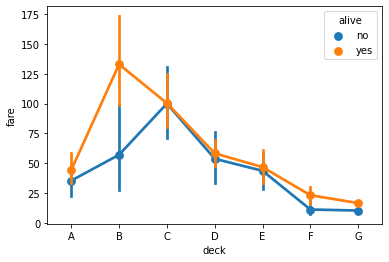

In [17]:
sns.pointplot(data=df, x="deck", y="fare", hue= "alive")

## 8. lmplot으로 x축에 age 값을 y축에 fare 를 그리고 class 에 따라 다른 색상으로 표현되게 합니다.
* 나이와 요금에 따른 상관관계를 봅니다.
<img src="https://i.imgur.com/7p2SJdA.png">

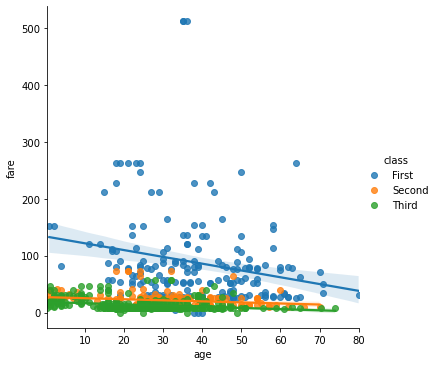

In [19]:
sns.lmplot(data=df, x="age", y="fare", hue="class")

## 9. age 와 fare 에 따른 상관계수를 구하고 결과를 df_corr 에 할당해 주세요.
그리고 df_corr 에 담긴값을 출력합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>fare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>age</th>
      <td>1.000000</td>
      <td>0.096067</td>
    </tr>
    <tr>
      <th>fare</th>
      <td>0.096067</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

In [25]:
df_corr=df[["age", "fare"]].corr()
df_corr

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


## 10. 위에서 만든 상관계수를 heatmap 으로 표현해 주세요.
* annot=True 옵션으로 그래프에서 상관계수가 표시되도록 해주세요.

<AxesSubplot:>

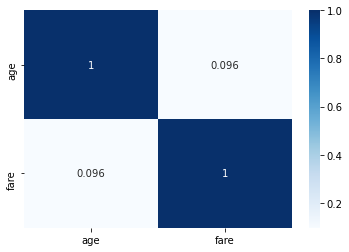

In [27]:
sns.heatmap(df_corr,annot=True, cmap='Blues')